# Лекция 3. Описание Линейных систем. Преобразование Лапласа

<ul>
Здесь и далее мы будем работать с математическими моделями управляемых диамических объектов. Эти модели составляются на основе физических законов. На предыдущих занятиях мы обсуждали, что модель системы, как правило будет описываться системой обыкновенных дифференциальных уравнений, имеющей вид:

$$\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, \mathbf{u}, t), \tag{1}$$ 

где $\mathbf{x}$ - вектор состояния системы, $\mathbf{u}$ - вектор управляющих параметров.
    
Довольно часто уравнение (1) представляет собой систему нелинейных дифференциальных уравнений, однако здесь речь пойдёт о тех системах, модель управляемой динамики которых может быть представлена (в силу постановки задачи или благодаря линеаризации уравнений (1)) системой линейных дифференциальных уравений.
    
</ul>

<h3>Пространство состояний</h3>
Линейная непрерывная сстема управления описывается векторным линейным обыкновенным дифференциальным уравнением первого порядка:
$$\dot{\mathbf{x}} = \mathbf{A}\cdot \mathbf{x} + \mathbf{B} \cdot \mathbf{u} + \mathbf{D}_1 \cdot \mathbf{v}, \tag{2}$$

где $\mathbf{x} \in \mathbb{R}^n$ &mdash; вектор состояния,<br>
$\mathbf{u} \in \mathbb{R}^m$ &mdash; вектор управляющих параметров,<br>
$\mathbf{v} \in \mathbb{R}^p$ &mdash; вектор внешних возмущений или шумов, действующих на систему,<br>
$\mathbf{A}$ &mdash; матрица состояния.

И управление $\mathbf{u}$, и возмущение $\mathbf{v}$ называют входами системы. 

На практике часто бывает так, что состояние системы неизвестно (не измеряется непосредственно), а известен некоторый выход $\mathbf{y}(t) \in \mathbb{R}^l$:

$$ \mathbf{y} = \mathbf{C}\cdot \mathbf{x} + \mathbf{D}_2\cdot \mathbf{v}, \tag{3}$$

где $\mathbf{C}$ &mdash; матрица выхода.

Уравнение (2) принято называть уравнением состояния, уравнение (3) - уравнением выхода. Вместе они образуют описание системы в пространстве состояний.

Целью управления является такой выбор функции управления $\mathbf{u}(t)$ или $\mathbf{u}(\mathbf{x},t)$ которое придаёт системе управления (2) требуемые свойства (например, устойчивость или оптимальность в соответствии с некоторым критерием качества).

<h3>Пример</h3>
<p>Рассмотрим контур системы управления ориентацией спутника. Вектор состояния в этом случае включает в себя параметры ориентации, задаваемые, например, кватернионом $q$ и угловую скорость $\boldsymbol{\omega}$. 
    
Заметим, что уравнения (1) в данном случае сводятся к системе кинематических уравнений Пуассона и динамических уравнений Эйлера (система нелинейна):</p>
$$\begin{cases}
    \dot{q} = \frac{1}{2}q \circ \boldsymbol{\omega} \\
    \dot{\boldsymbol{\omega}} = \mathbf{J}^{-1}\cdot(-\boldsymbol{\omega} \times \mathbf{J} \cdot \boldsymbol{\omega} + \mathbf{M}_{ext} + \mathbf{M}_{ctrl})
\end{cases}$$
<p>Выход &mdash; это набор наблюдаемых или измеряемых параметров, связываемых (при помощи уравнения (3)) с состоянием системы. При наличии в контуре системы управления ориентацией звёздного датчика (ЗД) и датчика угловой скорости (ДУС) выход &mdash; это сразу $q$ и $\boldsymbol{\omega}$:
$$ЗД \rightarrow q$$
$$ДУС \rightarrow \boldsymbol{\omega}$$

В студенческих спутниках, как правило, находятся иные датчики: магнитометры, датчики Солнца, вертикали и др. В таком случае измеряются другие величины, которые можно конвертировать в состояние, но не само состояние. В линейных системах можно пользоваться уравнением выхода (3) для описания связи между $\mathbf{y}$ и $\mathbf{x}$.
</p>
<h3>Упражнение</h3>
<ol>
<li>Попробуйте записать (нелинейное) уравнение выхода для системы ориентации, в которой измеряется магнитное поле (магнитометром, в связанным со спутником осях) и сравнивается с бортовой моделью геомагнитного поля (выход которой представляется в некоторых инерциальных осях)</li>
<li>То же самое, но для комбинаций датчиков магнитометр + датчик угловой скорости, магнитометр + солнечные датчики, магнитометр + солнечные датчики + датчики угловой скорости</li>
</ol>


<h2> Передаточные функции </h2>
Введём <b>оператор дифференцирования</b><br>
$$
    s = \frac{d}{dt}.
$$<br>

Действие оператора, соответственно,<br>
$$
    s \cdot x(t) = \dot{x}(t).
$$

Оператор, представленный в форме <b>полинома</b>:<br>
$$
    p(s) = a_0 + a_1 s + a_2 s^2 + ... + a_k s^k,
$$
действует на вектор $\mathbf{x}$ как <br>
$$
    p(s) \cdot x(t) = a_0 x(t) + a_1 \dot{x}(t) + ...
$$

Рассмотрим ранее введённые уравнения состояния (2). Из системы
$$\begin{cases}
    \dot{\mathbf{x}} = \mathbf{A} \cdot \mathbf{x} + \mathbf{B}\cdot \mathbf{u} + \mathbf{D}_1 \cdot \mathbf{v}\\
    \dot{\mathbf{x}}(t) = s\cdot \mathbf{x}(t) 
\end{cases}$$
получим
$$
\mathbf{x} = (s \cdot \mathbf{I} - \mathbf{A})^{-1} \cdot(\mathbf{B}\cdot \mathbf{u} + \mathbf{D}_1\cdot\mathbf{v}).
$$
Подставляя получившееся выражение в уравнение выхода (3), получим
$$
 \mathbf{y} = \mathbf{C} \cdot (s \mathbf{I} - \mathbf{A})^{-1}\cdot \mathbf{B}\cdot \mathbf{u} + (\mathbf{C}\cdot(s \cdot\mathbf{I} - \mathbf{A})^{-1}\cdot\mathbf{D}_1 + \mathbf{D}_2)\cdot\mathbf{v}.
$$
Вводя новые обозначения, запишем последнее выражение в виде
$$
\mathbf{y} = G_{yu}(s)\cdot \mathbf{u} + G_{yv}(s) \cdot\mathbf{v},
$$
где<br>
$G_{yu}(s) = \mathbf{C}\cdot(s \cdot\mathbf{I} - \mathbf{A})^{-1}\cdot \mathbf{B}$ &mdash; <b>передаточная функция от управления к выходу</b>,<br>
$G_{yv}(s) = \mathbf{C}\cdot(s \cdot\mathbf{I} - \mathbf{A})^{-1}\cdot \mathbf{D}_1 + \mathbf{D}_2$ &mdash; <b>передаточная функция от возмущения к выходу</b>.<br>
Таким образом, входной сигнал линейно преобразуется в выход.
<p>
<b>Характеристический полином</b> матрицы $\mathbf{A}$<br>
$$
Q(s) = det(s\cdot \mathbf{I} - \mathbf{A})
$$
будет находиться в знаменателе при записи формул для вычисления обратных матриц. Нули характеристического полинома, т.е. собственные числа матрицы состояния $\mathbf{А}$ &mdash; полюса передаточных функций &mdash; характеризуют положения, при которых на ограниченное воздействие происходит неограниченный отклик.</p>

<h2>Преобразование Лапласа</h2>
<p><b>Преобразование Лапласа</b> $\mathcal{L}:  x(t) \rightarrow X(s)$ т., что
$$
X(s) = \int_0^{\infty} x(t) e^{-st} dt,
$$
где $s$ - комплексная переменная.<br>
Здесь
$x(t)$ называется оригиналом,
$X(s)$ &mdash; изображением.<br>
Предъявляются следующие требования:
<ol>
<li>$x(t)$ определена на $[0; +\infty)$ и кусочно-дифференцируема,
<li>$x(t) \equiv 0$ при $t < 0$, 
<li>$\exists \alpha > 0$ и $\exists M > 0:$ $|x(t)| < M e^{\alpha t}$ на $[0; +\infty)$.
</ol>
</p>
<p><b>Обратное</b> преобразование Лапласа
$$
x(t) = \frac{1}{2 \pi i} \int_{a - i\infty}^{a + i \infty} x(s) e^{st}ds,
$$
где $Re(S) = a > \alpha$.
</p>
<p>
<b>Свойства</b> преобразования Лапласа:
<ol>
<li>Линейность: $\forall \alpha, \beta > 0 \hookrightarrow$
$$
\mathcal{L}\{\alpha x_1(t) + \beta x_2(t)\} = \alpha \mathcal{L}\{x_1(t)\} + \beta \mathcal{L}\{x_2(t)\}.
$$
</li>
<li>Дифференцирование оригинала
$$
\mathcal{L}\{\dot{x}(t)\} = sX(s) - x(0),
$$
</li>
где $X(s) = \mathcal{L}\{x(t)\}$.
<li>Интегрирование оригинала
$$
\mathcal{L}\{\int_0^\tau x(\tau) d\tau\} = \frac{X(s)}{s}
$$
</li>
<li>Теорема о запаздывании:
$$
\mathcal{L}\{x(t - \tau)\} = e^{-\tau s}X(s)
$$
</li>
<li>
Теорема о свёртке:
$$
X_1(s) X_2(s) = \mathcal{L}\{\int_0^t x_1(\tau) x_2(t - \tau) d\tau\} = \mathcal{L}\{\int_0^t x_1(t - \tau) x_2(\tau) d\tau\}
$$
</li>
</ol>
</p>


## Преобразование Лапласа с помощью символьных вычислений в Python

$$\mathcal{L}\{x(t)\}=\int_0^{\infty}{x(t) e^{-st}}dt$$

In [1]:
import sympy
import matplotlib.pyplot as plt

In [2]:
# t, s и a - символьные переменные
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real = True, positive = True)

In [3]:
# f - экспонента, заданная с помощью введённых ранее символов
f = sympy.exp(-a*t)
f

exp(-a*t)

In [4]:
# определим две функции, для прямого и обратного преобразования Лапласа

def L(f):
    return sympy.laplace_transform(f,t,s, noconds=True)

def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [5]:
# вычислим прямое преобразование Лапласа от экспоненциальной функции f
F = L(f)
F

1/(a + s)

In [6]:
# вычислим обратное преобразование Лапласа от получившегося изображения 
# (заметьте, результат содержит фуункцию Хевисайда, равную нулю для всех t<0)
invL(F)

exp(-a*t)*Heaviside(t)

In [9]:
# построим таблицу преобразований Лапласа для некоторых стандатных функций
# в этой ячейке определяется набор функций-оригиналов
omega, tau = sympy.symbols('omega, tau', real=True)
n = sympy.symbols('n', int=True, positive = True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
delta = sympy.DiracDelta
hv = sympy.Heaviside

functions = [1, 
             delta(t),
             delta(t-a),
             hv(t), 
             exp(-a*t), 
             t*exp(-a*t),
             t**n*exp(-a*t),
             sin(omega*t), 
             cos(omega*t)]

functions

[1,
 DiracDelta(t),
 DiracDelta(-a + t),
 Heaviside(t),
 exp(-a*t),
 t*exp(-a*t),
 t**n*exp(-a*t),
 sin(omega*t),
 cos(omega*t)]

In [10]:
# в этой ячейке определяется набор функций-изображений
Fs = [L(f) for f in functions]
Fs

[1/s,
 1 - Heaviside(0),
 exp(-a*s),
 1/s,
 1/(a + s),
 (a + s)**(-2),
 (a + s)**(-n - 1)*gamma(n + 1),
 omega/(omega**2 + s**2),
 s/(omega**2 + s**2)]

In [11]:
from pandas import DataFrame

In [12]:
def makelatex(args):
    return ["$${}$$".format(sympy.latex(a)) for a in args]

In [13]:
tblLaplace = DataFrame(list(zip(makelatex(functions),makelatex(Fs))))
tblLaplace.columns = ["Оригинал", "Изображение"]
tblLaplace

,Оригинал,Изображение
0,$$1$$,$$\frac{1}{s}$$
1,$$\delta\left(t\right)$$,$$1 - \theta\left(0\right)$$
2,$$\delta\left(- a + t\right)$$,$$e^{- a s}$$
3,$$\theta\left(t\right)$$,$$\frac{1}{s}$$
4,$$e^{- a t}$$,$$\frac{1}{a + s}$$
5,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
6,$$t^{n} e^{- a t}$$,$$\left(a + s\right)^{- n - 1} \Gamma\left(n +...
7,$$\sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
8,$$\cos{\left(\omega t \right)}$$,$$\frac{s}{\omega^{2} + s^{2}}$$


# Упражнение
Вычислите преобразование Лапласа для $\delta$-функции вручную, сравните результат с полученным в таблице. Объясните разницу

# Описание и анализ одномерных систем

Для простоты рассмотрим систему с одномерным входом (единичная размерность вектора управляющих параметров $\mathbf{u}$) и одномерным выходом ($\mathbf{y}$). Такие системы называют в литературе SISO (single input - single output system), в отличие от MIMO (multiple inpupt - multiple output).

Система описывается дифференциальным уравнением
$$
a_nx^{(n)}(t) + a_{n-1}x^{(n-1)}(t) + ... + a_0 x(t) = b_mu^{(m)}(t) + ... + b_0 u(t). \tag{4}
$$
<p>
Подвергнем уравнение (4) преобразованию Лапласа при нулевых начальных условиях:
\begin{equation}\label{eq:poly}
Q_n(s) X(s) = P_m(s) U(s), \tag{5}
\end{equation}
$Q_n, P_m$ &mdash; полиномы от $s$.
Отсюда
$$
X(s) = \frac{P_m(s)}{Q_n(s)}U(s)
$$
</p>

Введём несколько определений:

<p>
<b>Передаточной функцией</b> (в изображениях Лапласа) $H(s)$ будем называть имеющее наименьший порядок отношение изображений её выходной и входной переменных при нулевых начальных условиях.
</p>

В силу линейности преобразования Лапласа, а также в силу свойства дифференцирования изображения полином $Q(s)$ является характеристическим полиномом однородного уравнения, соответствующего уравнению $\eqref{eq:poly}$.

Пользуясь уравнением $\eqref{eq:poly}$, можно записать
\begin{equation} \label{eq:transfer_fun}
X(s) = H(s)U(s). \tag{6}
\end{equation}

<b>Весовой функцией</b> $h(t)$ будем называть отклик системы на единичное импульсное воздействие ($\delta$-функцию) при нулевых начальных условиях.
</p>

Таким образом, весовая функция равна выходу $h(t) = x(t)$ системы при входе $u(t)=\delta(t)$. Преобразование Лапласа от входа $\mathcal{L}\{\delta(t)\} = 1$, поэтому в силу $\eqref{eq:transfer_fun}$
\begin{equation}\label{eq:delta_resp}
\mathcal{L}\{h(t)\} = H(s). \tag{7}
\end{equation}

<p>
<b>Переходной функцией</b> $\pi(t)$ будем называть отклик системы на единичное ступенчатое воздействие ($\theta(t)$ - функция Хевисайда) при нулевых начальных условиях.
</p>

Переходная функция равна выходу $h(t) = x(t)$ системы при входе $u(t)=\theta(t)$. Преобразование Лапласа от входа $\mathcal{L}\{\theta(t)\} = 1/s$, поэтому в силу $\eqref{eq:transfer_fun}$ и теоремы о дифференцировании оригинала
\begin{equation}\label{eq:step_resp}
\dot{\pi}(t) = h(t). \tag{8}
\end{equation}

## Пример

Пусть требуется определить переходную и весовые функции некоторого звена, передаточная функция которого задана как 

$ H(s) = \frac{4}{s +2}$. 

In [14]:
H_s = 4/(s+2)
H_s

4/(s + 2)

#### Весовая функция $h(t)$ может быть определена как

In [15]:
h_t = invL(H_s)
h_t

4*exp(-2*t)*Heaviside(t)

#### В свою очередь,  переходная функция $\pi(t)$ 

In [16]:
pi_t = invL(H_s/s)
pi_t

2*Heaviside(t) - 2*exp(-2*t)*Heaviside(t)

### Построим графики найденных переходной и весовой функций

In [30]:
pi_plot = sympy.plotting.plot(pi_t, (t, -1, 8), show = False)[0]
h_plot = sympy.plotting.plot(h_t, (t, -1, 8), show = False)[0]

pi_vs_t = pi_plot.get_points() 
h_vs_t = h_plot.get_points()

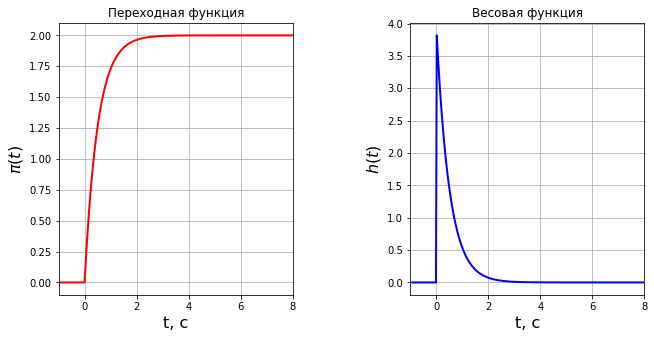

In [29]:
plt.rcParams['axes.labelsize'] = 16

fig = plt.figure(figsize=(10.5, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# do subplot 1 
ax1.plot(pi_vs_t[0], pi_vs_t[1], color='red', linewidth = 2)  # plot x**2 in green
ax1.set_xlim([-1, 8])
ax1.set_xlabel('t, c')
ax1.set_ylabel('$\pi(t)$')
ax1.set_title('Переходная функция')  
ax1.grid()

# do subplot 2
ax2.plot(h_vs_t[0], h_vs_t[1], color='blue', linewidth = 2)  # plot x**3 in red
ax2.set_xlim([-1, 8])
ax2.set_xlabel('t, c')
ax2.set_ylabel('$h(t)$')
ax2.set_title('Весовая функция')
ax2.grid()

fig.subplots_adjust(wspace=0.5)
plt.show()